# 🖼️ Create Pictogram Chart Using Python

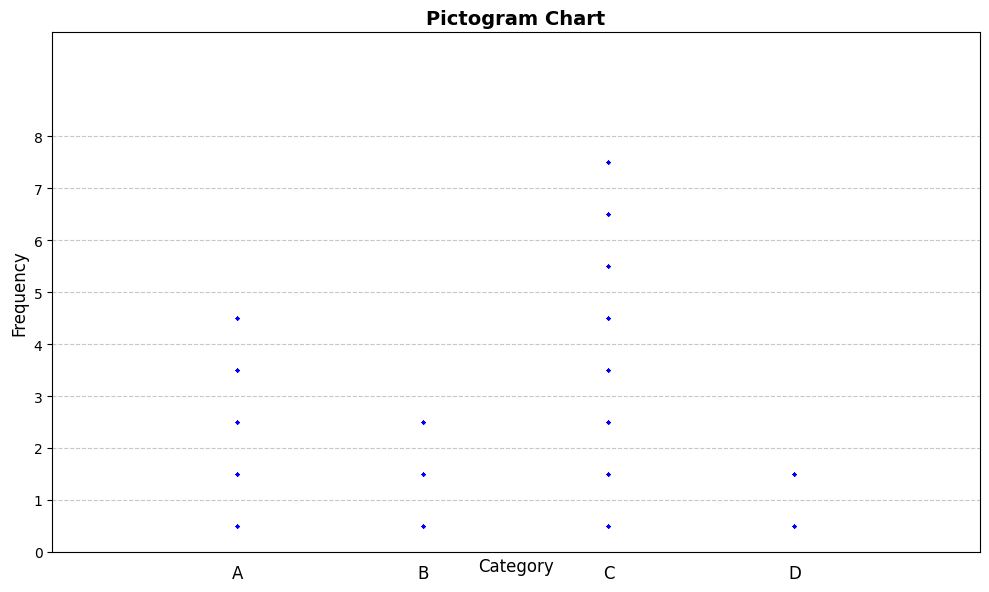

In [2]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageDraw
import os

# 🎨 Generate a placeholder icon if not already present
def generate_icon(path='icon.png', size=50, color='blue'):
    if not os.path.exists(path):
        img = Image.new('RGB', (size, size), color='white')
        draw = ImageDraw.Draw(img)
        draw.ellipse((10, 10, size-10, size-10), fill=color)
        img.save(path)

# 🧠 Load a symbol or icon image
def get_icon(path, zoom=0.1):
    try:
        return OffsetImage(plt.imread(path), zoom=zoom)
    except FileNotFoundError:
        raise FileNotFoundError(f"❌ Icon file '{path}' not found. Ensure the file exists or use generate_icon() to create one.")

# 📊 Pictogram Chart
def plot_pictogram_chart(data, image_path, title="Pictogram Chart 📈"):
    categories = data['Category']
    frequencies = data['Frequency']
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(-1, len(categories))
    ax.set_ylim(0, max(frequencies) + 2)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Category', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

    # 🔁 Add the icons repeatedly for each category
    for i, (cat, freq) in enumerate(zip(categories, frequencies)):
        for j in range(freq):
            icon = get_icon(image_path, zoom=0.1)
            ab = AnnotationBbox(icon, (i, j + 0.5), frameon=False)
            ax.add_artist(ab)
        ax.text(i, -0.5, cat, ha='center', fontsize=12)

    ax.set_xticks([])
    ax.set_yticks(range(max(frequencies) + 1))
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 📁 Example Data
data = {
    'Category': ['A', 'B', 'C', 'D'],
    'Frequency': [5, 3, 8, 2]
}

# 🛠️ Generate an icon if it doesn't exist
icon_path = 'icon.png'
generate_icon(icon_path)

# 🖼️ Plot the Pictogram Chart
plot_pictogram_chart(data, icon_path)
